## Import dependencies

First, we need to import the agent and the environment.

Along with the agent and the environment, we also need to import torch and matplotlib. `%matplotlib inline` allows us to show the plots in Jupyter.

In [1]:
import torch
from IPython.display import clear_output
from collections import deque
from src.agent import Agent, DQN_algo, DoubleDQN_algo
from src import environment as env
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("error")

%matplotlib inline

## Train function

We define a helper function to make it easy to run multiple training episodes.

In [2]:
def train(env_train, agent, episodes, label=None):
    scores = deque([0] * 100, maxlen=100)
    steps = []
    avg_scores = []
    for i in range(1, episodes + 1):
        score = env.episode(env_train, agent, train_mode=True)

        scores.append(score)

        avg = sum(scores)/len(scores)
        torch.save(agent.dqn_local.state_dict(), 'model.pth')

        steps.append(i)
        avg_scores.append(avg)

        clear_output(wait=True)
        print("{}episodes: {}/{}, average score: {}".format("{} - ".format(label if label != None else ""), i, episodes, avg))

        # if avg >= 13:
        #     break
    
    return steps, avg_scores

## Start the environment

The next block will initialize a default environment. The default environment is optimized for training.

In [3]:
env_train = env.Environment()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## Create agent and train

Now we can run this next block as many times as we like until we get the desired results.

We can tweak the hyperparameters when we intialize the agent. The hypermarameters are:
- `gamma`. This is the discount factor
- `lr`. Learning rate
- `ep_decay`, `ep_start`, `ep_min`. Epsillon related parameters
    - *Formula for decay is `max(ep_start * (ep_decay ** t_step), ep_min)`*
- `buffer_size`. Replay buffer size
- `batch_size`. Mini batch size
- `learn_every`. Number of experience steps to take before taking a learn step

Double DQN/PER - episodes: 500/500, average score: 14.56


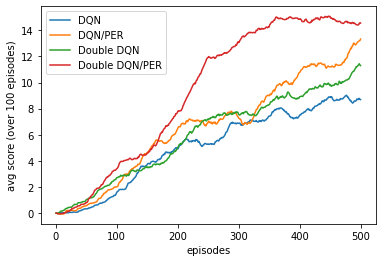

In [5]:
agent = Agent(env_train.state_size, env_train.action_size, gamma=1, seed=0, lr=0.001, targets_algo=DQN_algo)
steps, score = train(env_train, agent, 500, label="DQN")
plt.plot(steps, score, label="DQN")

agent = Agent(env_train.state_size, env_train.action_size, gamma=1, seed=0, lr=0.001, priority_alpha=0.5, targets_algo=DQN_algo)
steps, score = train(env_train, agent, 500, label="DQN/PER")
plt.plot(steps, score, label="DQN/PER")

agent = Agent(env_train.state_size, env_train.action_size, gamma=1, seed=0, lr=0.001, targets_algo=DoubleDQN_algo)
steps, score = train(env_train, agent, 500, label="Double DQN")
plt.plot(steps, score, label="Double DQN")

agent = Agent(env_train.state_size, env_train.action_size, gamma=1, seed=0, lr=0.001, priority_alpha=0.5, targets_algo=DoubleDQN_algo)
steps, score = train(env_train, agent, 500, label="Double DQN/PER")
plt.plot(steps, score, label="Double DQN/PER")

plt.legend()
plt.xlabel("episodes")
plt.ylabel("avg score (over 100 episodes)")
plt.show()

## Close the environment

After we are done with training, we need to close the environment.

In [6]:
env_train.close()